# Проект: Проверка гипотез по увеличению выручки в интернет-магазине

**Описание проекта**

В распоряжении есть список 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Efforts. Файлы с результатами A/B теста (два датасета с данными о визитах и выручке).

В датасетах - id заказа и пользователя, дата заказа, выручка, группа A/B-теста, в которую попал заказ, количество пользователей в указанную дату в указанной группе A/B-теста.

**Задачи:** 
- приоритизировать гипотезы (используются фреймворки ICE и RICE);
- провести анализ результатов A/B теста(стабильности кумулятивных метрик; относительного изменения кумулятивных метрик группы B к группе A; выбросов, определяется граница для определения аномальных пользователей)

**План работы:**

- Часть 1. Приоритизация гипотез

- Часть 2. Анализ A/B-теста

**Описание данных:**

Файл /datasets/hypothesis.csv:

- **Hypothesis** — краткое описание гипотезы;
- **Reach** — охват пользователей по 10-балльной шкале;
- **Impact** — влияние на пользователей по 10-балльной шкале;
- **Confidence** — уверенность в гипотезе по 10-балльной шкале;
- **Efforts** — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Файл /datasets/orders.csv:

- **transactionId** — идентификатор заказа;
- **visitorId** — идентификатор пользователя, совершившего заказ;
- **date** — дата, когда был совершён заказ;
- **revenue** — выручка заказа;
- **group** — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv:

- **date** — дата;
- **group** — группа A/B-теста;
- **visitors** — количество пользователей в указанную дату в указанной группе A/B-теста.


## Часть 1. Приоритизация гипотез

### 1.1 Загрузим данные и подготовим их к анализу

In [1]:
import pandas as pd

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')  # гипотезы по увеличению выручки интернет-магазина

In [3]:
hypothesis.columns = hypothesis.columns.str.lower() # приведем к нижнему регистру названия столбцов

### 1.2 Изучим исходный датафрейм hypothesis

In [4]:
pd.set_option('display.max_colwidth', 300)
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### 1.3 Применим фреймворк ICE для приоритизации гипотез

**ICE** (от англ. impact, confidence, effort / «влияние, уверенность, усилия») — один из самых популярных способов приоритизации задач: параметры ICE в данном случае оценивают по шкале от 0 до 10, где 0 — «охват гипотезы ни на кого не повлияет», а 10 — «гипотеза охватит хотя бы половину пользователей».

In [5]:
hypothesis['ICE'] = round(hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'], 1)

In [6]:
pd.set_option('display.max_colwidth', 300)
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending = False) # отсортируем их по убыванию приоритета

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


По ICE: **девятая гипотеза** ("Запустить акцию, дающую скидку на товар в день рождения") - самая перспективная. Затем идут гипотезы **1** ("Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"), **8** ("Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	") и **7** ("Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию").

### 1.4 Применим фреймворк RICE для приоритизации гипотез

**RICE** (R от англ. reach, «охват») - модификация метода ICE, как и в случае ICE, параметры RICE оценивают по шкале от 0 до 10.

In [7]:
hypothesis['RICE'] = hypothesis['impact'] * hypothesis['confidence'] * hypothesis['reach'] / hypothesis['efforts']

In [8]:
pd.set_option('display.max_colwidth', 300)
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending = False) # отсортируем их по убыванию приоритета

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


По RICE: **восьмая гипотеза** ("Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок") - самая перспективная. Затем идут гипотезы **3** ("Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	"), **1** ("Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей") и **7** ("Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию").

**Вывод:** При применении RICE вместо ICE изменилась приоритизация гипотез. На первом месте оказалась гипотеза с инедксом **8** ("Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"), в виду того, что ее параметр  Reach (скольких пользователей затронет изменение, которое мы хотим внести) равен 10, в то время как у других гипотез он меньше. В числе перспективных гипотез при обоих способах приоритизации задач остаются гипотезы с индексами **1** ("Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей") и **7** ("Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию	").

## Часть 2. Анализ A/B-теста

### 2.1 Загрузим данные и подготовим их к анализу

In [9]:
# Импортируем нужные библиотеки
import pandas as pd
import scipy.stats as stats
import numpy as np
import math as mth
import datetime as dt
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
warnings.filterwarnings('ignore')

In [10]:
# Загрузим исходные данные 
orders, visitors = (
    pd.read_csv('/datasets/orders.csv'),  # заказы
    pd.read_csv('/datasets/visitors.csv')  # визиты
)

### 2.2 Изучим исходный датафрейм orders

In [11]:
orders.head(10) # изучим первые 10 строк датафрейма

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [12]:
orders.info() # исходная информация датафрейма 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [13]:
orders['date'] = pd.to_datetime(orders['date']) # скорректируем тип данных столбца date

In [14]:
orders.isna().sum() # определение пропусков в столбцах

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [15]:
orders.duplicated().sum() # определение количества дубликатов

0

In [16]:
orders.groupby('group')['visitorId'].nunique() # определение количества уникальных значений

group
A    503
B    586
Name: visitorId, dtype: int64

In [17]:
# Определим дату начала проведения теста
min_test_date_o = orders['date'].min()
min_test_date_o

Timestamp('2019-08-01 00:00:00')

Дата начала теста - 1 августа 2019 года.

In [18]:
# Определим дату окончания проведения теста
max_test_date_o = orders['date'].max()
max_test_date_o

Timestamp('2019-08-31 00:00:00')

Дата окончания проведения теста - 31 августа 2019 года.

### 2.3 Изучим исходный датафрейм visitors

In [19]:
visitors.head(10) # изучим первые 10 строк датафрейма 

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [20]:
visitors.info() # исходная информация датафрейма 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [21]:
visitors['date'] = pd.to_datetime(visitors['date']) # скорректируем тип данных столбца date

In [22]:
visitors.isna().sum() # определение пропусков в столбцах

date        0
group       0
visitors    0
dtype: int64

In [23]:
visitors.duplicated().sum() # определение количества дубликатов

0

In [24]:
# Определим дату начала проведения теста
min_test_date_v = visitors['date'].min()
min_test_date_v

Timestamp('2019-08-01 00:00:00')

Дата начала проведения теста - 1 августа 2019 года.

In [25]:
# Определим дату окончания проведения теста
max_test_date_v = visitors['date'].max()
max_test_date_v

Timestamp('2019-08-31 00:00:00')

Дата окончания проведения теста - 31 августа 2019 года.

### 2.4 Построим график кумулятивной выручки по группам

In [26]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


In [27]:
# Проверим дату начала проведения теста и сравним с датой в исходным данных
cumulativeData['date'].min()

Timestamp('2019-08-01 00:00:00')

**Дата начала проведения теста - 1 августа 2019 года. Данные совпадают с исходными.**

In [28]:
# Проверим дату окончания проведения теста и сравним с датой в исходным данных
cumulativeData['date'].max()

Timestamp('2019-08-31 00:00:00')

**Дата окончания проведения теста - 31 августа 2019 года. Данные совпадают с исходными.**

**Построим график кумулятивной выручки по группам A/B-тестирования:**

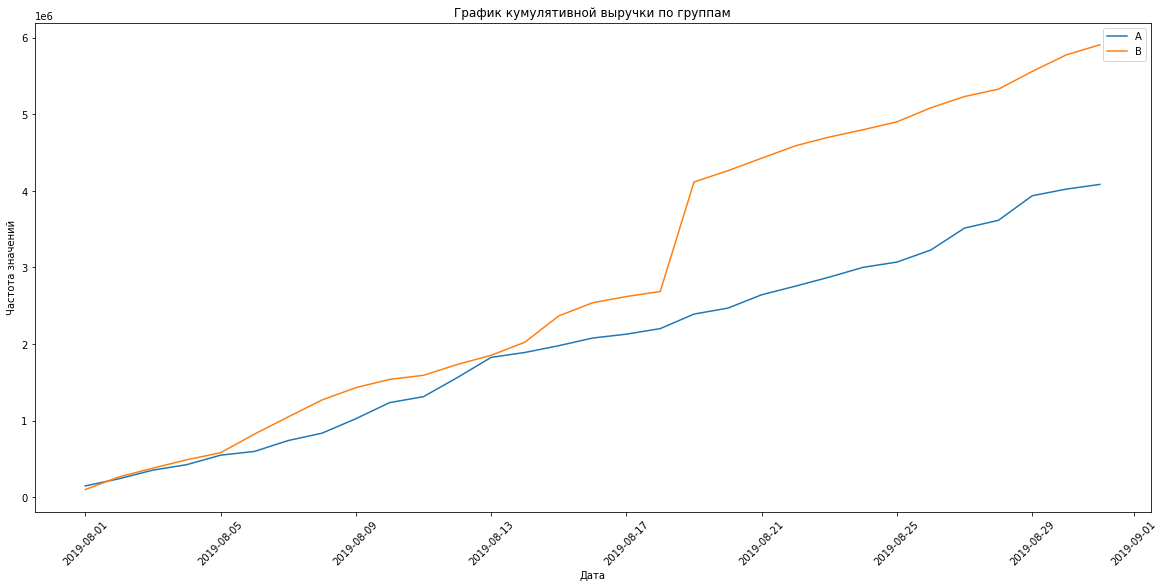

In [29]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(20,9))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Частота значений')
plt.xticks(rotation=45)

plt.legend();

**Вывод:** С начала теста сегмент В вырвался вперед и продолжал лидировать на протяжении всего теста. 
Однако график выручки группы В в середине теста резко начал расти. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. В группе А выручка почти равномерно увеличивается в течение всего теста. Хороший знак.

### 2.5 Построим график кумулятивного среднего чека по группам

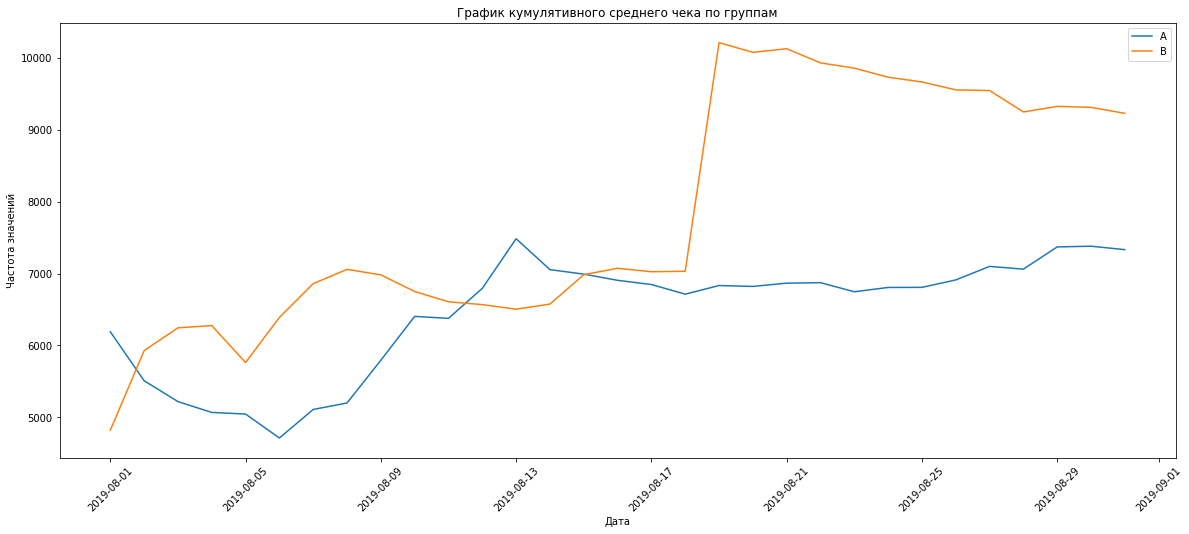

In [30]:
plt.figure(figsize=(20,8))
# Строим график среднего чека группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

# Строим график среднего чека группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Частота значений')
plt.xticks(rotation=45)

plt.legend(); 


**Вывод:** Кумулятивное значение среднего чека по сегментам испытывает колебания. Как и на графике выручки, видно, что в группе В снова случается резкий скачок 2019-08-19. В группе А сначала случился спад, затем резкий рост до середины теста, потом значение среднего чека начало выравниваться. Требуется дополнительный анализ выбросов, которые так сильно искажают результаты.

### 2.6 Построим график относительного изменения кумулятивного среднего чека группы B к группе A

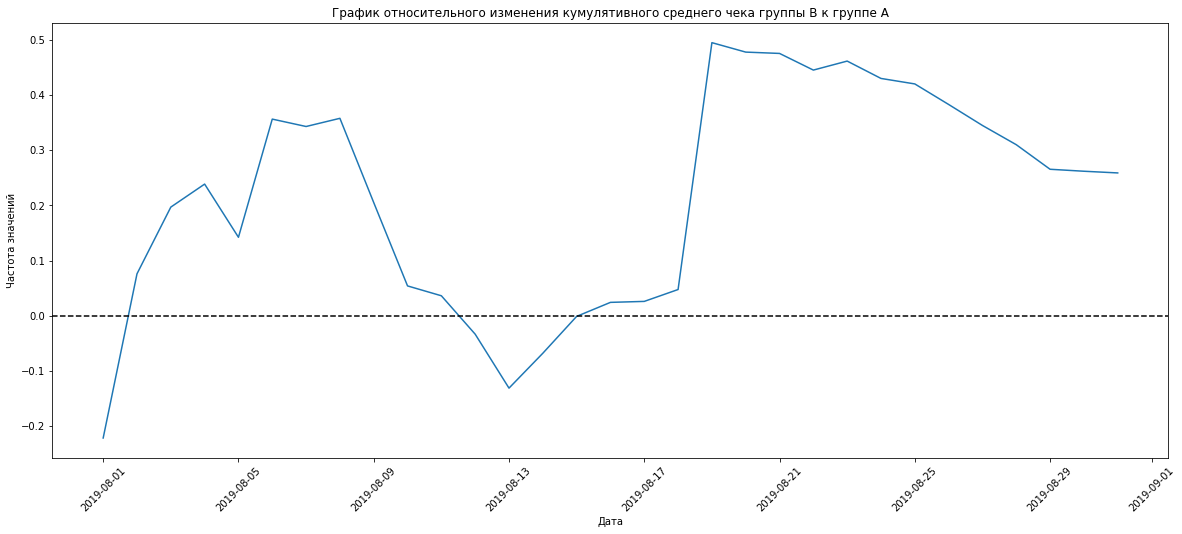

In [31]:
# объединим таблицы cumulativeRevenueA и cumulativeRevenueB
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)

# cтроим отношение средних чеков
plt.figure(figsize=(20,8))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.title('График относительного изменения кумулятивного среднего чека группы В к группе А')
plt.xlabel('Дата')
plt.ylabel('Частота значений')
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--');

**Вывод:** Результаты теста резко и значительно менялись в несколько дат. Видимо именно тогда были совершены аномальные заказы.

### 2.7 Построим график кумулятивного среднего количества заказов на посетителя по группам

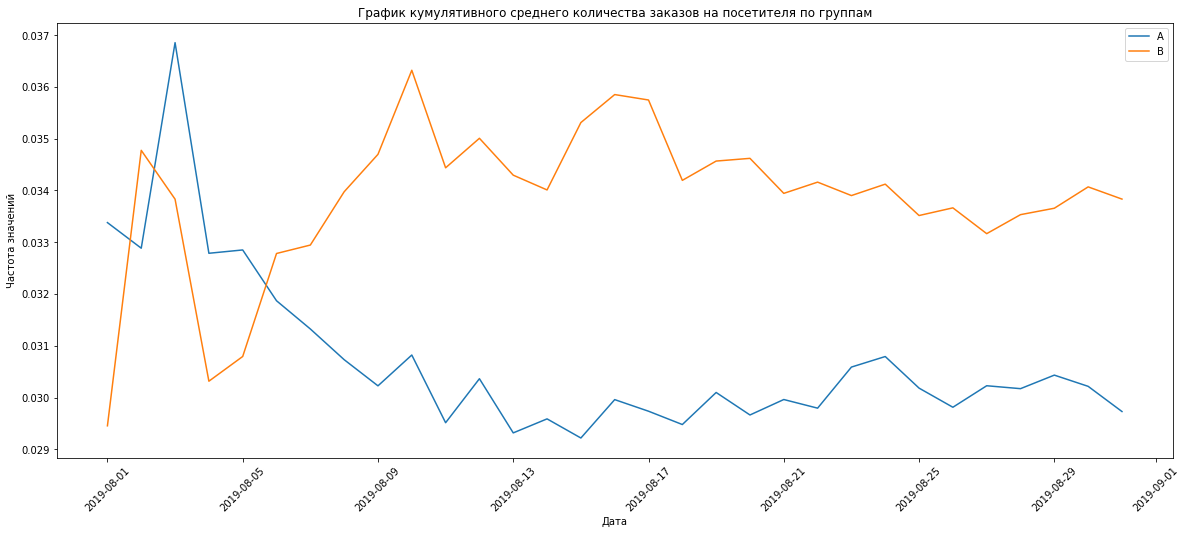

In [32]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(20,8))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Частота значений')
plt.xticks(rotation=45); 

**Вывод:** Получился симметричный график. В начале теста сегмент группы А имел бОльшую конверсию, но затем конверсия группы В вырвалась вперёд и зафиксировалась, а конверсия группы А просела и также зафиксировалась.

### 2.8 Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

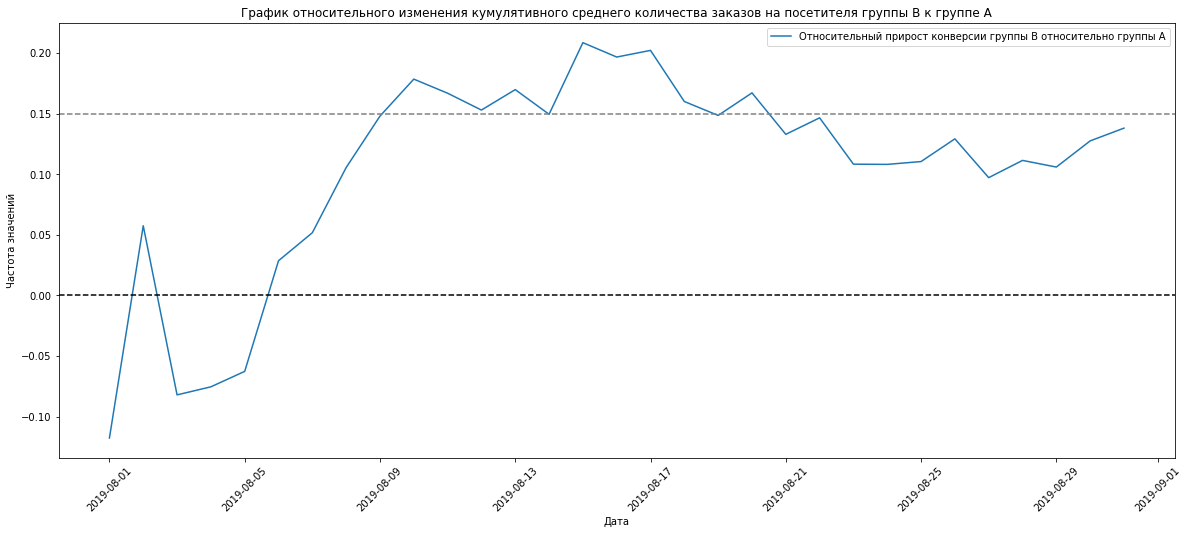

In [33]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']],
                              left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(20,8))
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")

plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы В к группе А')
plt.xlabel('Дата')
plt.ylabel('Частота значений')
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.legend();

**Вывод:** В начале теста группа B проигрывала группе A, затем вырвалась вперёд, потом снова просела, и с 2019-08-06 конверсия стала постепенно расти и, возможно, зафиксировалась около прироста в 15% относительно группы А. 

### 2.9 Построим точечный график количества заказов по пользователям

       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


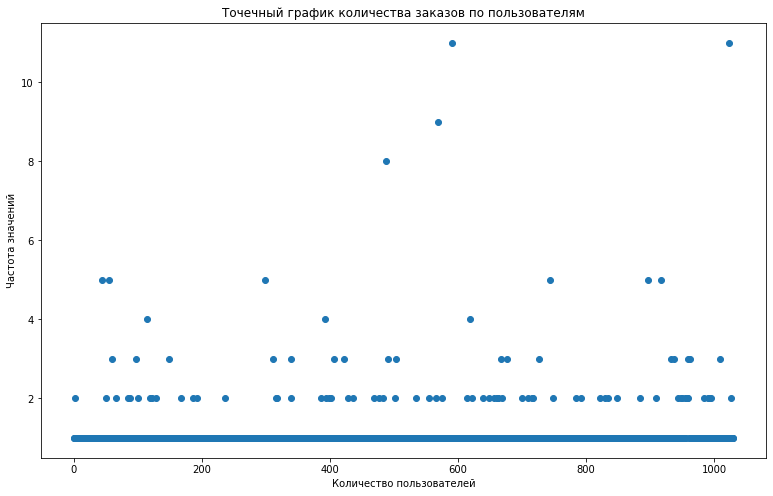

In [34]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'orders']

print (ordersByUsers.sort_values(by='orders', ascending=False).head(10))

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(13,8))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Количество пользователей')
plt.ylabel('Частота значений');


**Вывод:** Большинство покупателей заказывали только один раз. Однако доля пользователей с 2 заказами тоже значительна. Пользователей, заказавших более двух раз, совсем мало, они вполне могут быть аномальными.

### 2.10 Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей

In [35]:
print (ordersByUsers.sort_values(by='orders', ascending=False).head(10))
np.percentile(ordersByUsers['orders'], [95, 99])

       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


array([2., 4.])

**Вывод:** Не более 5% пользователей совершали больше двух заказов. И не более 1% пользователей - больше четырех заказов. За верхнюю границу числа заказов выберем 2 заказа на одного пользователя, тем самым отсеем аномальных пользователей по ней.

### 2.11 Построим точечный график стоимостей заказов

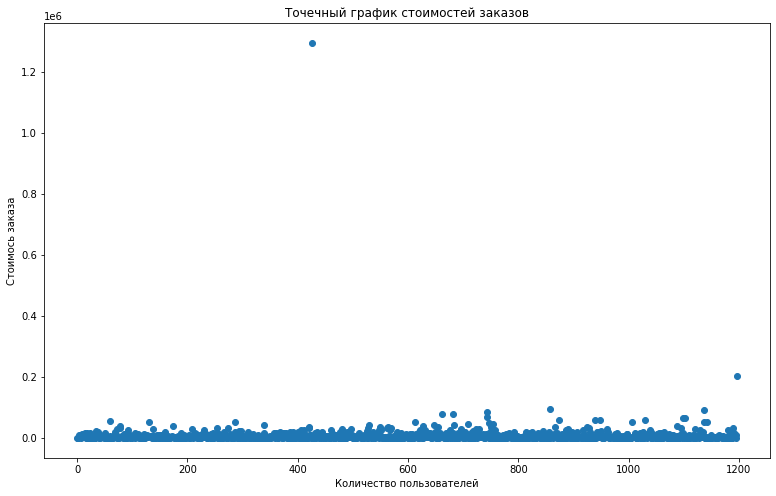

In [36]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(13,8))
plt.scatter(x_values, orders['revenue']) 
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимось заказа');

**Вывод:** На графике видим выбивающиеся значения со стоимостью заказа 200 000 и даже более 1 200 000. Введем ограничения по оси У, чтобы более наглядно рассмотреть картину.

      transactionId   visitorId       date  revenue group
425       590470918  1920142716 2019-08-19  1294500     B
1196     3936777065  2108080724 2019-08-15   202740     B
858       192721366  1316129916 2019-08-27    93940     A
1136      666610489  1307669133 2019-08-13    92550     A
744      3668308183   888512513 2019-08-27    86620     B
682      1216533772  4266935830 2019-08-29    78990     B
662      1811671147  4266935830 2019-08-29    78990     A
743      3603576309  4133034833 2019-08-09    67990     A
1103     1348774318  1164614297 2019-08-12    66350     A
1099      316924019   148427295 2019-08-12    65710     A


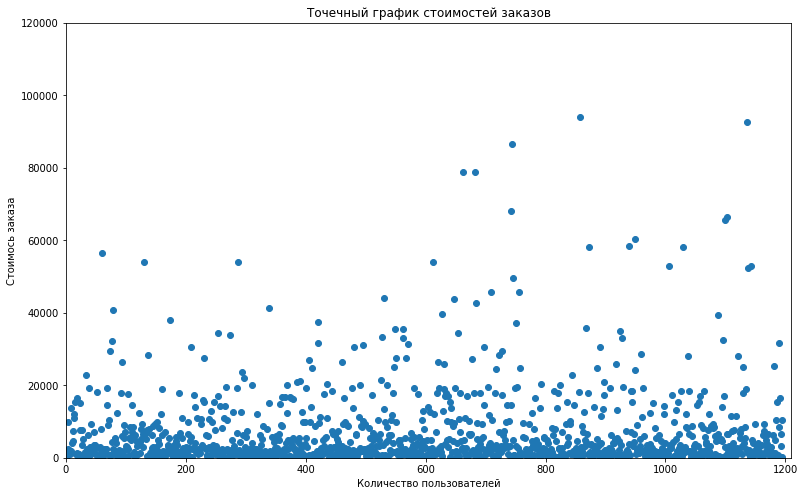

In [37]:
print(orders.sort_values(by='revenue', ascending=False).head(10))

x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(13,8))
plt.scatter(x_values, orders['revenue']) 
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимось заказа')
plt.axis([0, 1210, 0, 120000]);


**Вывод:** Есть заказы дороже 20 000. Например, около 40 000, 60 000, 80 000 и даже 100 000. Однако большинство всё-таки имеет меньшую выручку. Определить границу аномальных пользователей по этому графику достаточно сложно.

### 2.12 Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов

In [38]:
print(orders.sort_values(by='revenue', ascending=False).head(10))

np.percentile(orders['revenue'], [95, 99])


      transactionId   visitorId       date  revenue group
425       590470918  1920142716 2019-08-19  1294500     B
1196     3936777065  2108080724 2019-08-15   202740     B
858       192721366  1316129916 2019-08-27    93940     A
1136      666610489  1307669133 2019-08-13    92550     A
744      3668308183   888512513 2019-08-27    86620     B
682      1216533772  4266935830 2019-08-29    78990     B
662      1811671147  4266935830 2019-08-29    78990     A
743      3603576309  4133034833 2019-08-09    67990     A
1103     1348774318  1164614297 2019-08-12    66350     A
1099      316924019   148427295 2019-08-12    65710     A


array([28000. , 58233.2])

**Вывод:** Не более, чем у 5% заказов чек дороже 28 000 рублей. И не больше, чем у 1% заказов - дороже 58 233 рублей. За верхнюю границу числа заказов выберем заказы, стоимость которых не превышает 28 000 рублей, тем самым отсеем аномальных пользователей по ней.

### 2.13 Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

**Сформулируем гипотезы:** Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.

In [39]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительный прирост группы B к конверсии группы А = {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value = 0.017
Относительный прирост группы B к конверсии группы А = 0.138


**Вывод:** p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, ***отвергаем***. Анализ "сырых" данных сообщает, что в среднем количестве заказов между группами есть статистически значимые различия. Однако относительный прирост группы B к конверсии группы А равен 13.8%.

### 2.14 Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

**Сформулируем гипотезы:** Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть. 

In [40]:
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']
                        ['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительное различие среднего чека между группами В и А = {0:.3f}'.format
      (orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value = 0.729
Относительное различие среднего чека между группами В и А = 0.259


**Вывод:** р-value = 0.729, что значительно больше 0.05. Значит, ***нет причин отвергать*** нулевую гипотезу и считать, что в среднем чеке есть различия. Кроме того, относительное различие среднего чека между сегментами составляет 26%, что довольно-таки значительно.

### 2.15 Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

**Сформулируем гипотезы:** Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.

**Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 28 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers, удалим дубликаты, отсортируем по возрастанию.**

In [41]:
clean_orders = 2
clean_revenue = 28000

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > clean_orders]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > clean_orders]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > clean_revenue]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

abnormalUsers.head(5)


1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64

**Посчитаем статистическую значимость различия среднего количества заказов после удаления аномальных пользователей:**

In [42]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост группы B к конверсии группы А = {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value = 0.013
Относительный прирост группы B к конверсии группы А = 0.173


**Вывод:** p-value = 0.013 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, ***отвергаем***. Анализ "очищенных" данных сообщает, что в среднем количестве заказов между группами есть статистически значимые различия. Однако относительный прирост группы B к конверсии группы А равен 17.3%(выше, чем с "сырыми" данными - 13.8%). 

### 2.16 Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

**Сформулируем гипотезы:** Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть. 

In [43]:
print(
    'p-value = {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительное различие среднего чека между группами В и А = {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value = 0.738
Относительное различие среднего чека между группами В и А = -0.020


**Вывод:** р-value = 0.738, что значительно больше 0.05. Значит, ***нет причин отвергать*** нулевую гипотезу и считать, что в среднем чеке есть различия(как и с "сырыми" данными). А вот разница между сегментами В и А сократилась с 26% до 2%, это означает что после удаления выбросов в данных стало меньше шума.

## Вывод

В ***первой части проекта*** рассмотрен список из 9 гипотез по увеличению выручки интернет-магазина. При применении фреймворка ICE гипотеза **"Запустить акцию, дающую скидку на товар в день рождения"** - оказалась самой перспективной. При применении фреймворка RICE вместо ICE изменилась приоритизация гипотез. На первом месте оказалась гипотеза **"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"**, в виду того, что ее параметр Reach (скольких пользователей затронет изменение, которое мы хотим внести) равен 10, в то время как у других гипотез он меньше. В числе перспективных гипотез при обоих способах приоритизации задач в топ-4 остались гипотезы **"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"** и **"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"**.

Во ***второй части проекта*** проведен анализ результатов А/В-теста. По его итогам сделаны следующие выводы:

- Есть статистически значимые различия по **среднему количеству заказов** между группами по "сырым", и по данным после фильтрации аномалий. Относительный прирост группы B над A равен 13.8% по "сырым", и 17.4% по "очищенным" данным.


- Нет статистически значимых различий по **среднему чеку** между группами по «сырым», и по данным после фильтрации аномалий, несмотря на то, что средний чек группы B оказался всего на 2% ниже среднего чека группы A по "очищенным" данным, в то время как по "сырым" данным он был больше на 26%, что было определено после удаления аномальных выбросов.

- График различия **среднего количества заказов** между группами сообщает, что результаты группы B лучше группы A, и нет значительной тенденции к ухудшению.

- График различия **среднего чека** говорит о том, что результаты группы B лучше группы А.

 ***Решение по результатам теста:*** **Исходя из обнаруженных фактов, тест следует остановить и признать его успешным. Группа B значительно эффективнее группы A по конверсии, хотя по среднему чеку группы примерно равны.**